# Linear Regression from Scratch

## Formula:

$f(x) = x * w + b$

## Python Implementation

In [1]:
import numpy as np # math utilities and matrix operations
import matplotlib.pyplot as plt # visualization

In [2]:
def linear_regression(X: np.array, w: float, b: float):
    return (X * w) + b

## Example

In [3]:
w_solution, b_solution = 2.5, 1.5
X = np.array([1, 2, 3])
y = (X * w_solution) + b_solution

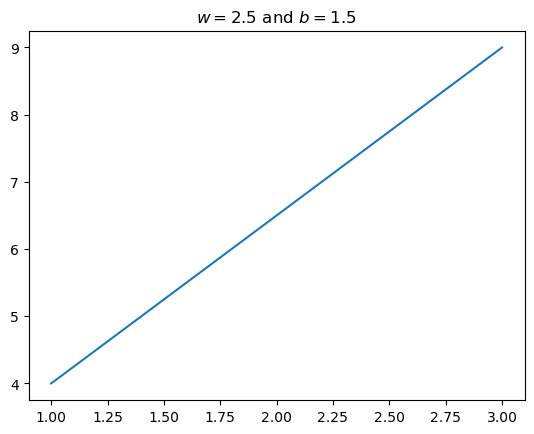

In [4]:
plt.plot(X, y)
plt.title(f"$w={w_solution}$ and $b={b_solution}$")
plt.show()

## Step 1: Define cost function

### Formula:

$J(w,b) = \frac{1}{2m}\sum_{i=1}^{m}(\hat{y}^(i) -y^{(i)})^2$

### Python Implementation

In [5]:
def cost(X, y, w, b):
    cost = 0
    m = X.shape[0] # size of X
    y_predicted = linear_regression(X, w, b)
    for i in range(m):
        diff = y_predicted[i] - y[i]
        diff = diff ** 2
        cost += diff
    cost = (1/(2*m)) * cost
    return cost

Testing the cost function

In [6]:
ws = np.arange(-10., 10., .1)
bs = np.arange(-10., 10., .1)
samples = [
    cost(X, y, w, b)
    for w, b in zip(ws, bs)
]

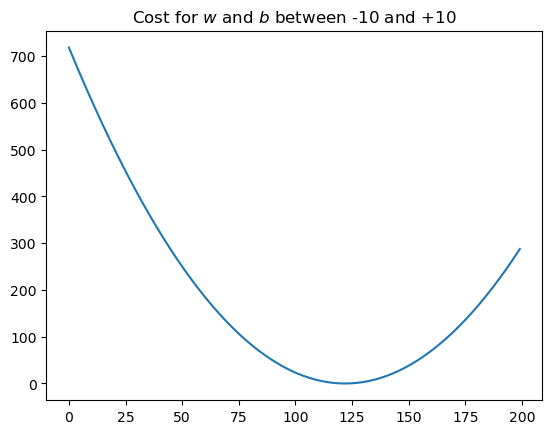

In [7]:
plt.plot(range(len(samples)), samples)
plt.title('Cost for $w$ and $b$ between -10 and +10')
plt.show()

## Step 2: Applying Gradient Descent to find $w$ and $b$

### Formula:

Goal:

$\text{min}_{w,b}J(w,b)$

where $w$ is updated as:

$w = w - \alpha \frac{\theta J(w,b)}{\theta w}$

where $\frac{\theta J(w,b)}{\theta w}$ is defined as $\frac{1}{m}\sum^{m-1}_{i=0}(f_{w,b}(x^{(i)})-y^{(i)})x^{(i)}$

and $b$ is updated as $b = b - \alpha \frac{\theta J(w,b)}{\theta b}$

where $\frac{\theta J(w,b)}{\theta b}$ is defined as $\frac{1}{m}\sum^{m-1}_{i=0}(f_{w,b}(x^{(i)})-y^{(i)})$, where:
- $\alpha$ is the learning rate
- $X$ is our independent variable
- $y$ is our dependent variable
- $m$ is the size of the vector $X$
- $i$ is an index in the vector $X$

In [8]:
def gradient_descent(X, y, w_in: np.array, b_in: float, alpha: float, n_iterations: int):
    w = w_in
    b = b_in
    m = X.shape[0]
    cost_history = []
    
    for _ in range(n_iterations):
        w_temp = 0
        b_temp = 0
        y_predict = linear_regression(X, w, b)
        for i in range(m):
            w_temp += (y_predict[i] - y[i]) * X[i]
            b_temp += (y_predict[i] - y[i])
        w_temp *= 1/m
        b_temp *= 1/m
        w = w - (alpha * w_temp)
        b = b - (alpha * b_temp)

        # Record cost
        cost_history.append(
            cost(X, y, w, b)
        )

    return w, b, cost_history

In [9]:
w, b = 0, 0 # initializing w and b
alpha = .001 # learning rate
iterations = 1_000
new_w, new_b, cost_history = gradient_descent(X, y, w, b, alpha, iterations)

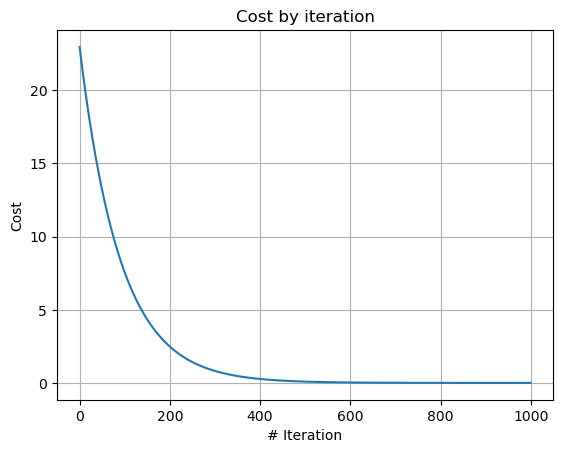

In [10]:
plt.plot(range(iterations), cost_history)
plt.title('Cost by iteration')
plt.xlabel('# Iteration')
plt.ylabel('Cost')
plt.grid()
plt.show()

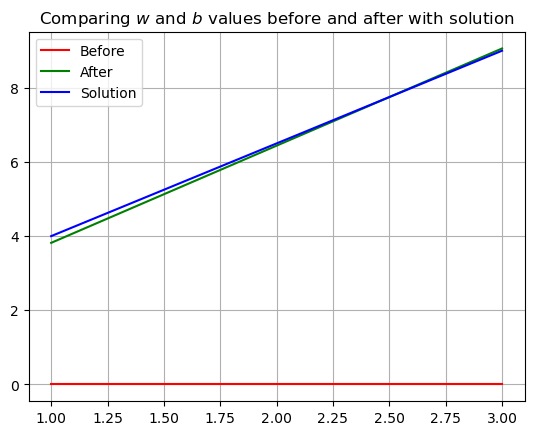

In [11]:
plt.plot(X, linear_regression(X, w, b), label='Before', color='red')
plt.plot(X, linear_regression(X, new_w, new_b), label='After', color='green')
plt.plot(X, linear_regression(X, w_solution, b_solution), label='Solution', color='blue')
plt.grid()
plt.legend()
plt.title('Comparing $w$ and $b$ values before and after with solution')
plt.show()